# Prediksi Weather Event untuk Pertanian

## Pendahuluan
Pada notebook ini, kita akan membuat model prediksi untuk kolom 'Weather Event' menggunakan metode Random Forest. Dataset yang digunakan adalah data cuaca dummy untuk pertanian.

## Import Library yang Dibutuhkan
Kita akan menggunakan beberapa library Python untuk melakukan analisis dan membangun model Random Forest.

In [ ]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


## Langkah 1: Memuat Dataset
Kita akan memuat dataset dummy cuaca untuk pertanian.

In [17]:
# Load the dataset
dummy_weather_df = pd.read_excel('2_prediksi_cuaca_pertanian.xlsx')
dummy_weather_df

,Date,Location,Temperature (C),Humidity (%),Rainfall (mm),Wind Speed (km/h),Season,Soil Moisture (%),Crop Type,Predicted Yield (kg/hectare),Weather Event
0,2025-01-21,Farm 2,31.929726,55,142,23,Transitional Season,57,Soybean,1915,Sunny
1,2025-03-04,Farm 3,27.773302,60,32,27,Wet Season,54,Wheat,2004,Drought
2,2025-01-16,Farm 1,28.182658,55,58,21,Transitional Season,44,Soybean,3828,Rainstorm
3,2025-01-25,Farm 5,28.234425,63,110,0,Dry Season,41,Vegetables,4480,Flood
4,2025-01-09,Farm 2,26.535520,87,121,16,Dry Season,67,Soybean,2473,Rainstorm
...,...,...,...,...,...,...,...,...,...,...,...
295,2025-02-05,Farm 5,21.230131,60,139,5,Wet Season,47,Rice,2142,Rainstorm
296,2025-02-18,Farm 4,25.112068,71,129,31,Dry Season,53,Vegetables,1577,Rainstorm
297,2025-02-21,Farm 5,31.252804,64,125,9,Transitional Season,61,Wheat,1930,Drought
298,2025-01-25,Farm 1,34.255947,88,96,23,Wet Season,30,Wheat,1534,Flood


## Langkah 2: Preprocessing Data
Kita akan melakukan encoding pada kolom kategori, seperti 'Weather Event' dan 'Season'.

In [18]:

# Encoding categorical variables (Weather Event and Season)
encoder = LabelEncoder()
dummy_weather_df['Weather Event'] = encoder.fit_transform(dummy_weather_df['Weather Event'])
dummy_weather_df['Season'] = encoder.fit_transform(dummy_weather_df['Season'])

# Splitting the data into features and target variable
X = dummy_weather_df.drop(columns=["Weather Event", "Date", "Location", "Crop Type"])
y = dummy_weather_df["Weather Event"]


## Langkah 3: Normalisasi Data
Kita akan melakukan normalisasi pada data fitur untuk memastikan nilai-nilai berada dalam rentang yang seragam.

In [19]:

# Normalizing the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


## Langkah 4: Membagi Data Train dan Test
Kita akan membagi dataset menjadi data pelatihan (train) dan data pengujian (test).

In [20]:

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## Langkah 5: Melatih Model
Sekarang kita akan membangun dan melatih model Random Forest.

In [21]:

# Building the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## Langkah 6: Evaluasi Model
Setelah model dilatih, kita akan mengevaluasi kinerjanya dengan menggunakan data uji.

In [22]:

# Making predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.18333333333333332
              precision    recall  f1-score   support

           0       0.11      0.07      0.08        15
           1       0.12      0.18      0.15        11
           2       0.31      0.40      0.35        10
           3       0.07      0.10      0.08        10
           4       0.38      0.21      0.27        14

    accuracy                           0.18        60
   macro avg       0.20      0.19      0.19        60
weighted avg       0.20      0.18      0.18        60



## Langkah 7: Prediksi
Kita akan menggunakan model untuk melakukan prediksi pada data baru.

In [30]:
# Example prediction (predicting on the first row of X_test)
example_prediction = rf_model.predict(X_test[:1])
print("Predicted Weather Event:", example_prediction)

Predicted Weather Event: [3]


## Langkah 8: Visualisasi
Kita akan menampilkan visualisasi hasil evaluasi model.

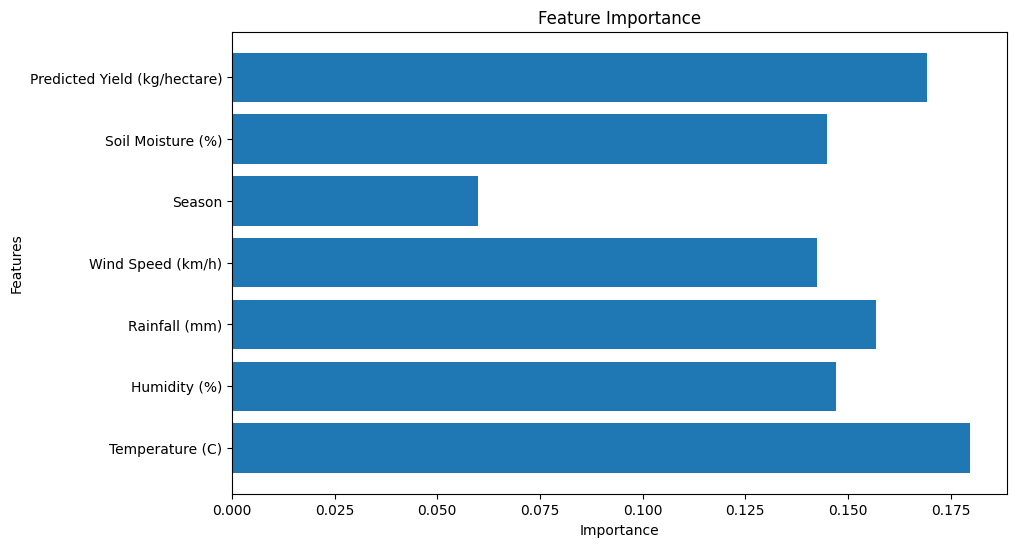

In [24]:

# Visualizing feature importance
feature_importances = rf_model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


## Keterangan Penting

Notebook ini menggunakan data dummy yang telah dibuat untuk memberikan gambaran dasar mengenai cara membangun model prediksi menggunakan Random Forest. Agar model ini menghasilkan prediksi yang lebih akurat dan relevan dengan kondisi lapangan, kustomisasi lebih lanjut diperlukan. Beberapa hal yang perlu dipertimbangkan antara lain:

1. Penyempurnaan Dataset: Data yang digunakan dalam notebook ini adalah data dummy yang bersifat acak. Untuk hasil yang lebih baik, dataset harus diisi dengan data cuaca yang lebih realistis dan sesuai dengan kondisi lokal yang relevan.

2. Penyesuaian Fitur: Beberapa fitur, seperti suhu, kelembaban, curah hujan, dan kecepatan angin, mungkin memerlukan modifikasi atau penambahan fitur lain yang lebih berdampak pada prediksi cuaca yang lebih akurat untuk pertanian.

3. Parameter Model: Untuk hasil prediksi yang lebih optimal, Anda dapat menyesuaikan parameter model Random Forest atau bahkan mencoba model lain yang lebih sesuai dengan karakteristik data.

4. Validasi Model: Melakukan validasi dengan data nyata dan cross-validation yang lebih mendalam untuk mengevaluasi kinerja model.